In [1]:
from Prices import get_df
from options_strategy import Option, OptionsStrategy
from Montecarlo import OptionsMC

# Getting DATA

In [5]:
df = get_df('IDBTVER', start="13/02/2020")

# Montecarlo

In [6]:
series = df['Close']
series

Date
2020-02-13    1442.69
2020-02-14    1447.54
2020-02-18    1448.25
2020-02-19    1450.23
2020-02-20    1450.39
               ...   
2022-05-20    1351.84
2022-05-23    1354.51
2022-05-24    1361.53
2022-05-25    1362.97
2022-05-26    1365.56
Name: Close, Length: 573, dtype: float64

# Strategy

<AxesSubplot:>

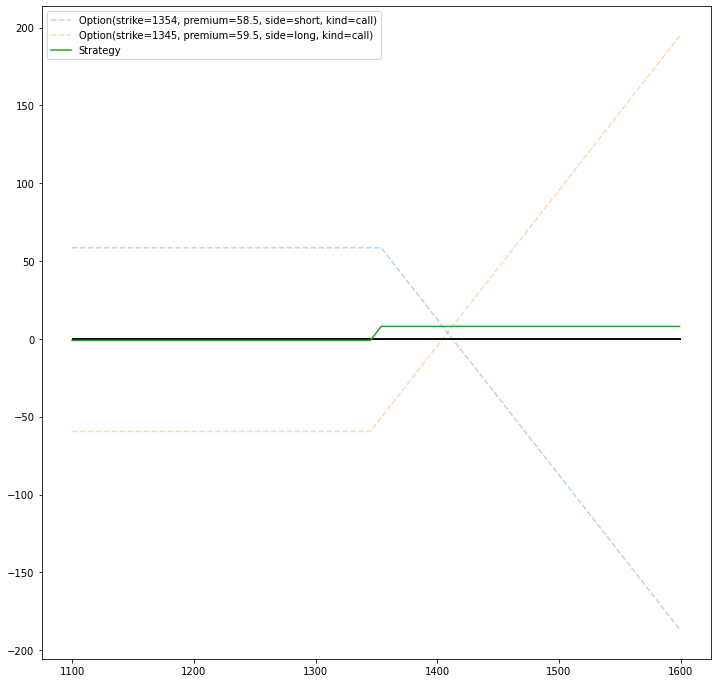

In [7]:
strategy = (OptionsStrategy()
            .add(strike=1354, premium=58.5, side="short", kind="call")
            .add(strike=1345, premium=59.5, side="long", kind="call"))
strategy.plot(1100, 1600)

<AxesSubplot:>

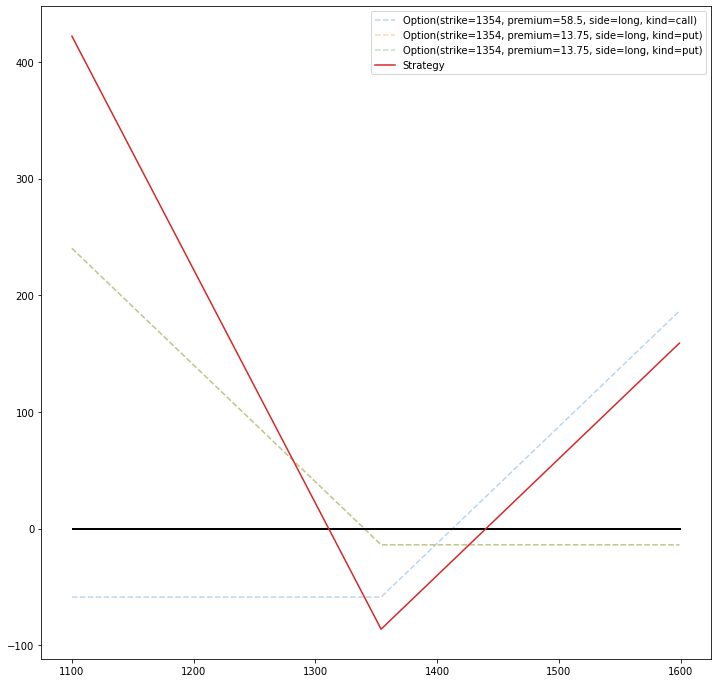

In [8]:
strategy = (OptionsStrategy().add(strike=1354, premium=58.5, side="long", kind="call")
            .add(strike=1354, premium=13.75, side="long", kind="put")
            .add(strike=1354, premium=13.75, side="long", kind="put"))
strategy.plot(1100, 1600)

# Markdown

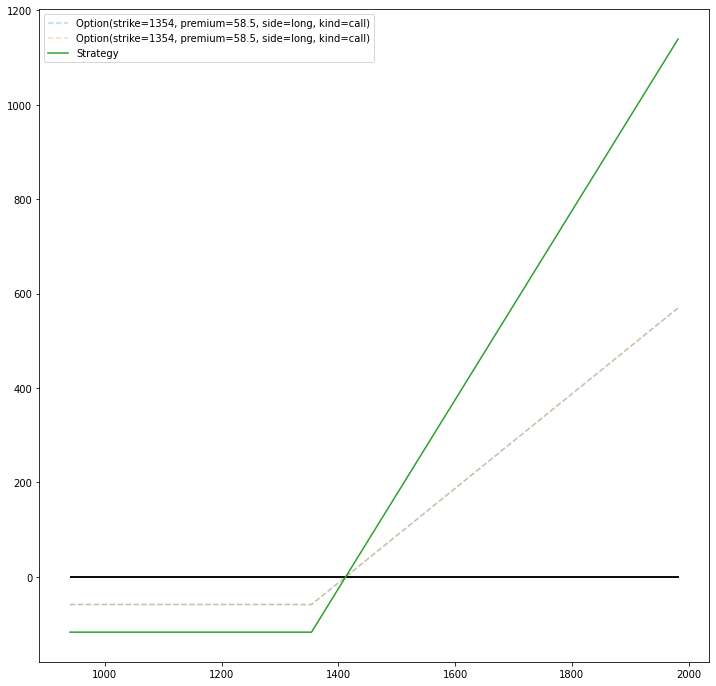

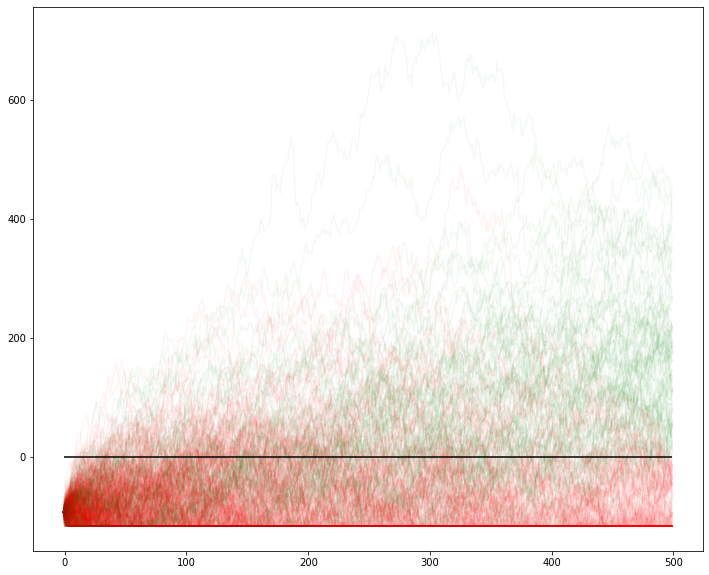

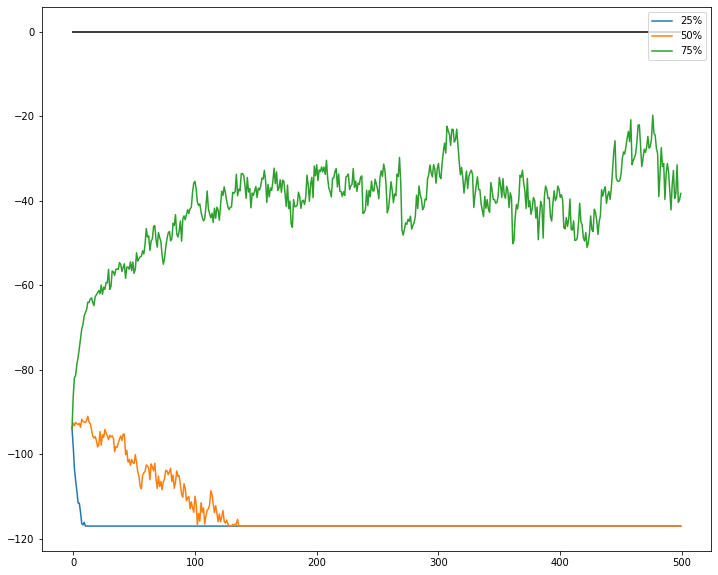

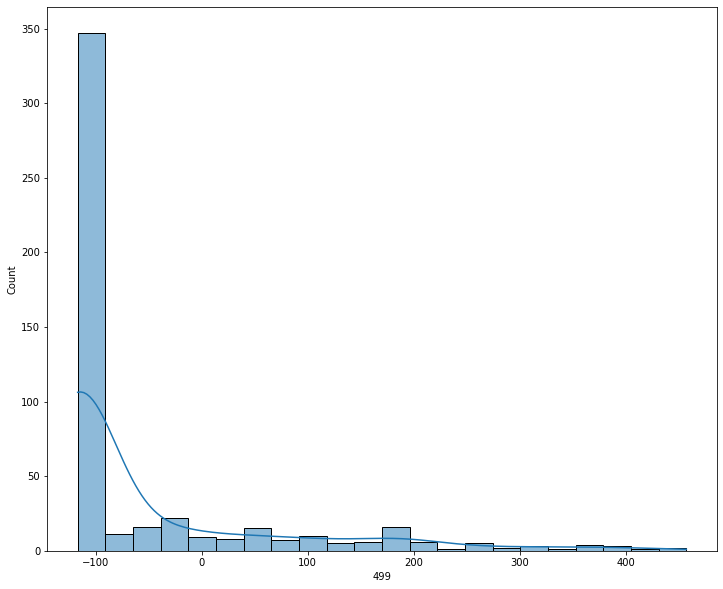

In [9]:
mc = OptionsMC(series, n_sims = 500)
(mc.add(strike=1354, premium=58.5, side="long", kind="call")
 .add(strike=1354, premium=58.5, side="long", kind="call"))
mc.plot_strategy()
mc.display()

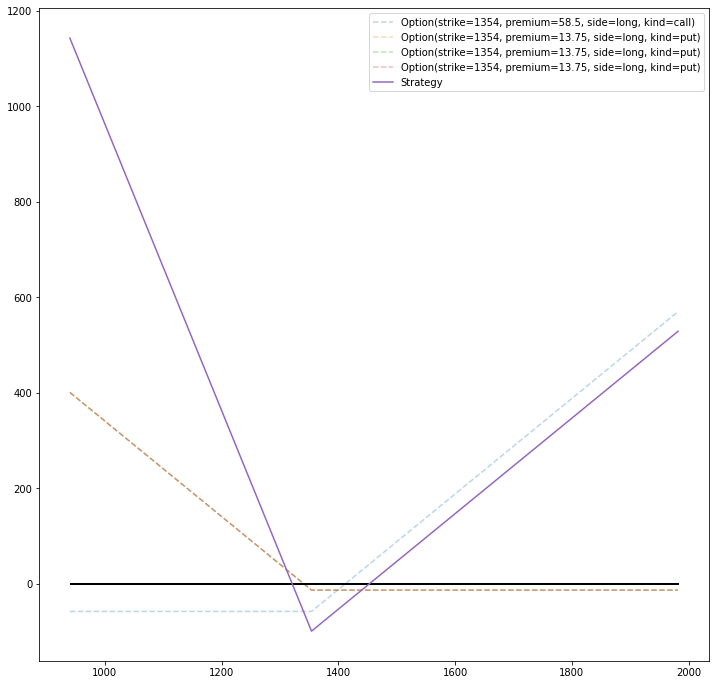

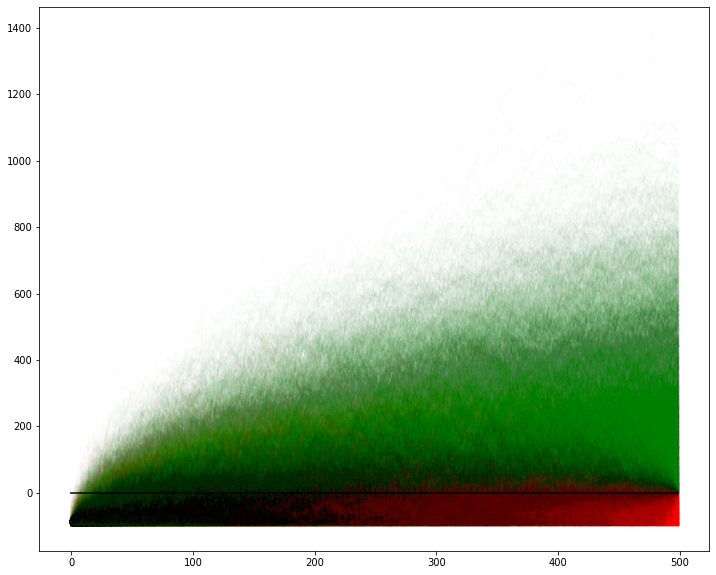

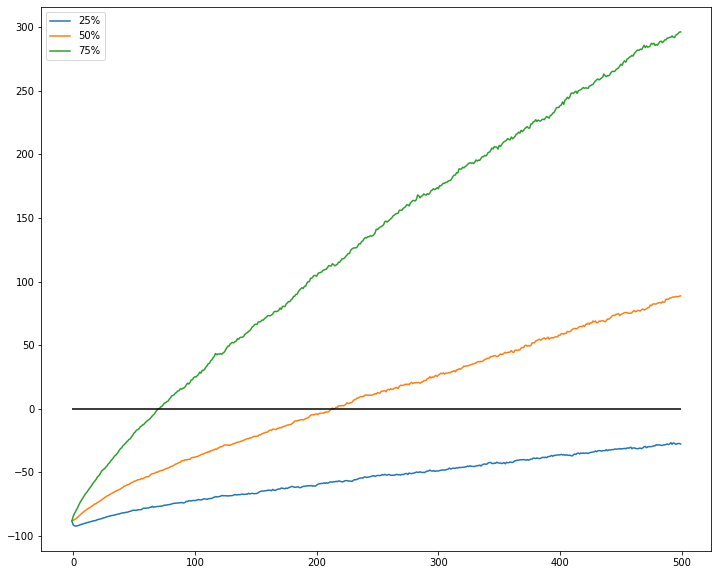

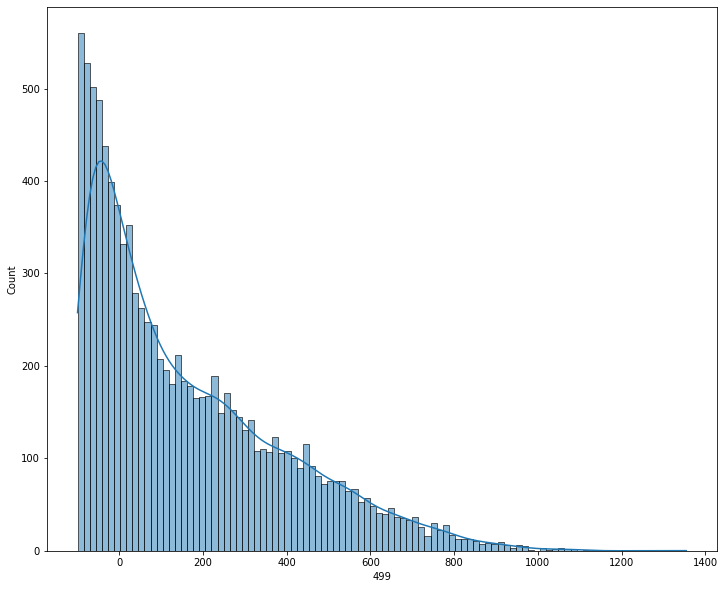

In [10]:
mc = OptionsMC(series, n_sims=10_000)
(mc.add(strike=1354, premium=58.5, side="long", kind="call")
 .add(strike=1354, premium=13.75, side="long", kind="put")
 .add(strike=1354, premium=13.75, side="long", kind="put")
.add(strike=1354, premium=13.75, side="long", kind="put")
 )
mc.plot_strategy()
mc.display()

# Auto Pricing Strategy

In [11]:
from options_strategy import BSOptionsStrategy

In [12]:
strategy = BSOptionsStrategy("AAPL")
strategy.b_and_s.last_price

143.78

<AxesSubplot:>

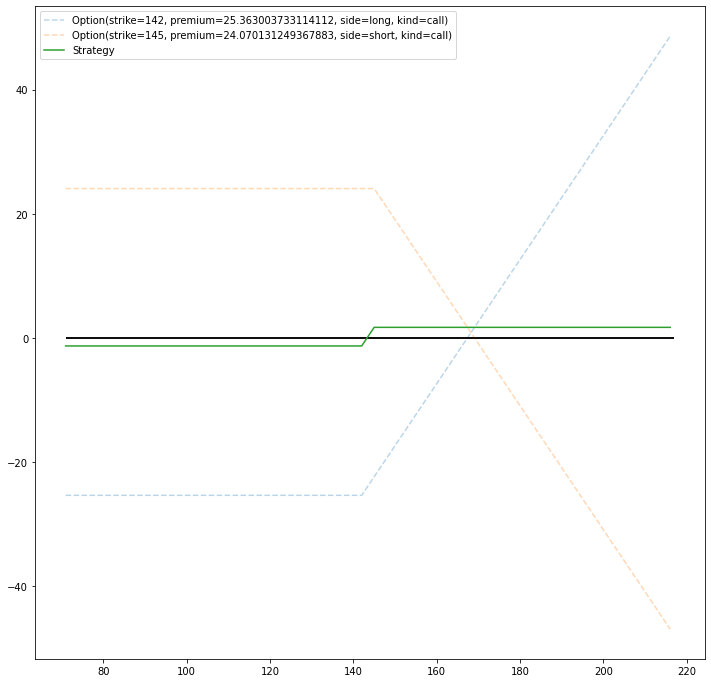

In [13]:
(strategy.add(strike=142, kind="call", side="long")
 .add(strike=145, kind="call", side="short"))

strategy.plot()